In [1]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

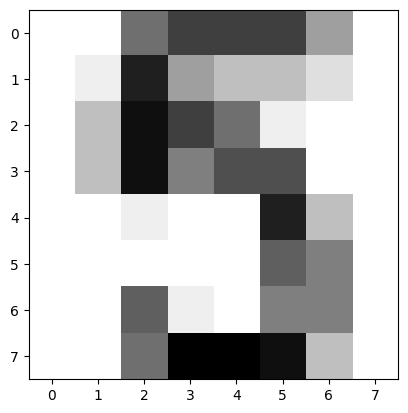

In [2]:
#Display image 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split 
X = digits.data
Y= digits.target

#Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [4]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a k-NN classifier with 3 nightbors: knn
knn = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier to the training data
knn.fit(X_train, Y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, Y_test)))

Accuracy: 0.9861111111111112


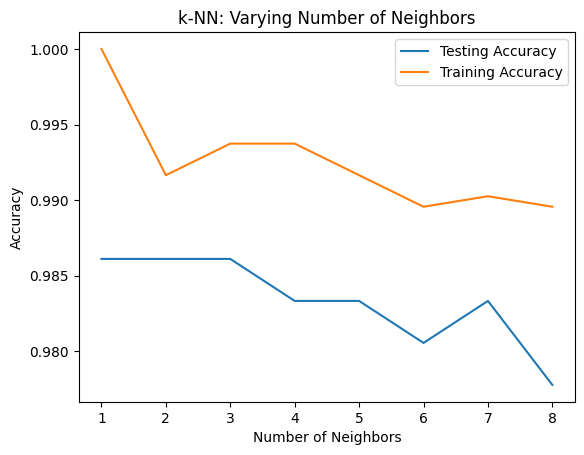

In [5]:
#Setup arrays to sore train nad test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i, k in enumerate(neighbors):
  #Setup a k-NN Classifier with k neighbors: knn
  knn = KNeighborsClassifier(n_neighbors = k)

  #FIt the classifier to the training data
  knn.fit(X_train, Y_train)

  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, Y_train)

  #Compute accuracy on the training set
  test_accuracy[i] = knn.score(X_test, Y_test)

#Generate plot 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as P
from torch.autograd import Variable

In [7]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root = '.', train = True, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 170547429.40it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 7437112.83it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 65664261.95it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13530205.09it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [8]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7F334271F040>, 5)


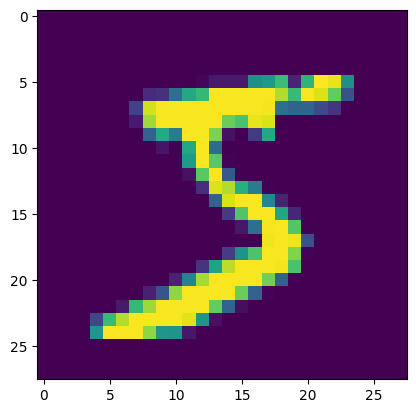

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [10]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fully = nn.Sequential(
        nn.Linear(28*28, 10)
    )

  def forward(self, x):
    x = x.view([-1, 28*28])
    x = self.fully(x)
    x = F.log_softmax(x, dim = 1)
    return x

In [11]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = True, transform = transforms.Compose([transforms.ToTensor()])), batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root = '.', train = False, transform = transforms.Compose([transforms.ToTensor()])), batch_size = 1, shuffle = True)

In [12]:
def train():
  learning_rate = 1e-3
  num_epochs = 3

  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

  for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      output = net(data)

      loss = F.nll_loss(output, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
        print('Epoch = %f. Batch = %s. Loss' % (epoch,batch_idx, loss.item()))
      
  return net

In [ ]:
net = train()

In [ ]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim = True)[1]
  correct += target.eq(pred.view_as(target)).sum()

print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

In [15]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

#Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

<ipython-input-16-3cf57014a7aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')


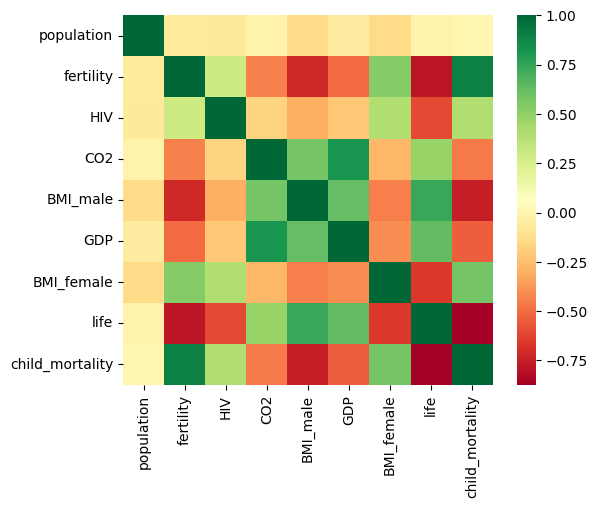

In [16]:
ax = sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')
plt.show()

0.6162438752151917


<function matplotlib.pyplot.show(close=None, block=None)>

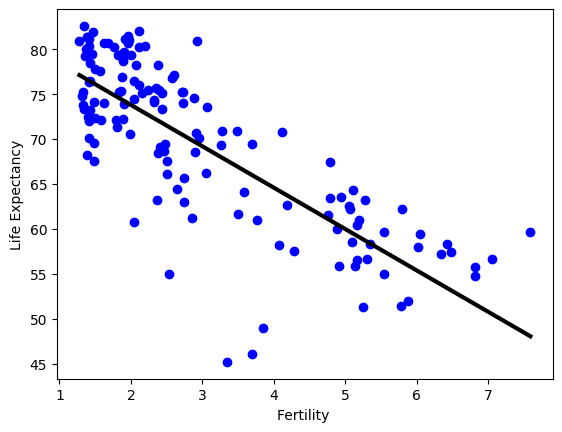

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size = 0.3, random_state = 42)

#Create the regression model: reg_all
reg = LinearRegression()

#Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(x_fertility, y_life))

#Plot regression Line
plt.scatter(x_fertility, y_life, color = 'blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility ')
plt.show

In [23]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size = 0.3, random_state = 42)

#Create the regression model: reg_all
reg_all = LinearRegression()

#Fit the regression to the training data
reg_all.fit(x_train, y_train)

#Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793176


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

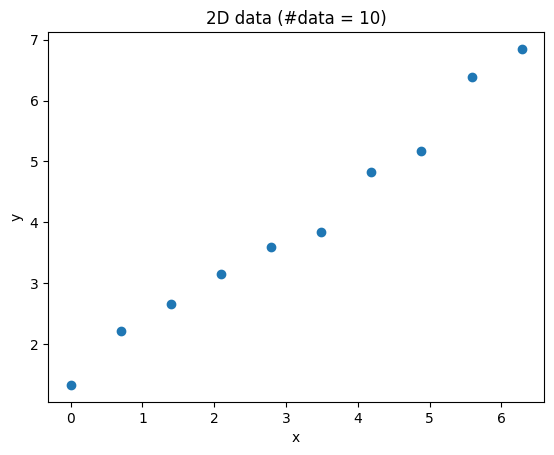

In [26]:
N = 10 #Number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi, N)
y = m*x + c + np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [27]:
import torch

In [30]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    sample = {
        'feature': torch.tensor([1, self.x[idx]]),
        'label': torch.tensor([self.y[idx]])}
    return sample

In [31]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.3291], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([2.2222], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.6650], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.1505], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.5954], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.8335], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.8242], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.1775], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.3916], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.8490], dtype=torch.float64)


In [33]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = shuffle, num_workers = num_workers)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [35]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



batch# = 0
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 5.5851],
        [1.0000, 6.2832],
        [1.0000, 4.1888]], dtype=torch.float64),
 'label': tensor([[3.1505],
        [6.3916],
        [6.8490],
        [4.8242]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 1.3963],
        [1.0000, 0.6981],
        [1.0000, 0.0000]], dtype=torch.float64),
 'label': tensor([[3.8335],
        [2.6650],
        [2.2222],
        [1.3291]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[5.1775],
        [3.5954]], dtype=torch.float64)}


In [38]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(MyModel, sel).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out